In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

 Visualize the First 36 Training Images

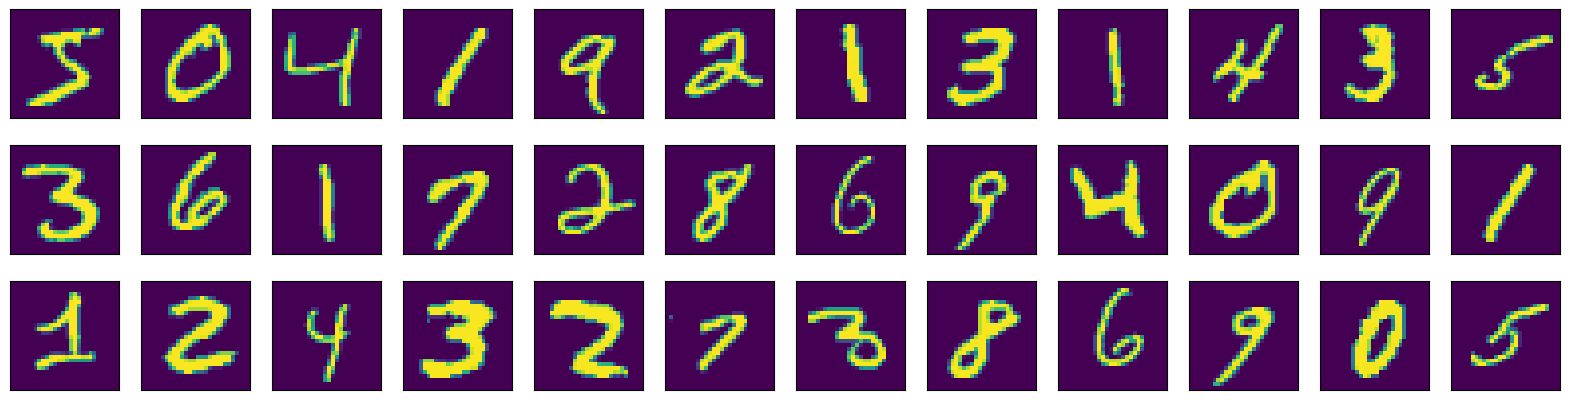

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

Rescale the Images by Dividing Every Pixel in Every Image by 255

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Class Distribution

In [ ]:
import numpy as np
y_all = np.concatenate([y_train, y_test])

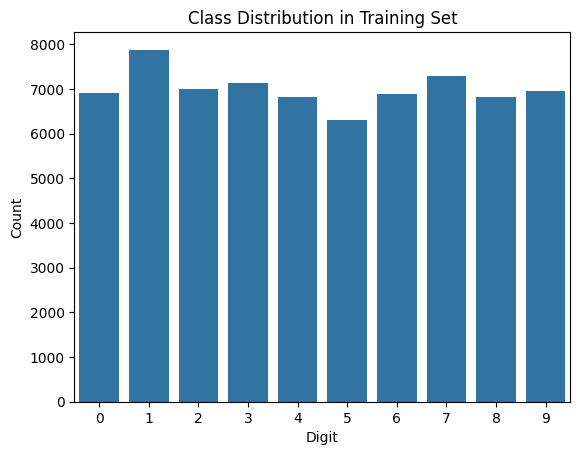

In [ ]:
import seaborn as sns
sns.countplot(x=y_all)
plt.title("Class Distribution in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()


In [ ]:
classes, counts = np.unique(y_all, return_counts=True)

for digit, count in zip(classes, counts):
    print(f"Digit {digit}: {count} samples")


Digit 0: 6903 samples
Digit 1: 7877 samples
Digit 2: 6990 samples
Digit 3: 7141 samples
Digit 4: 6824 samples
Digit 5: 6313 samples
Digit 6: 6876 samples
Digit 7: 7293 samples
Digit 8: 6825 samples
Digit 9: 6958 samples


In [ ]:
#It have little bit of imbalance but it is negligible.

 Preprocessing

Normalization

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Break Dataset into Training, Testing, and Validation Sets

In [9]:
#from keras.utils import np_utils
from tensorflow import keras

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)#Conver the array value(Class vector) into matrix
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(X_train, X_valid) = X_train[6000:], X_train[:6000]
(y_train, y_valid) = y_train[6000:], y_train[:6000]

# print shape of training set
print('x_train shape:', X_train.shape) # Output like How many number of images, image size, image size, How mant channels(RGB)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

x_train shape: (54000, 28, 28)
54000 train samples
10000 test samples
6000 validation samples


In [10]:
# Reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_valid = X_valid.reshape(-1, 28, 28, 1)

Model Architecture

In [11]:
# Model Architecture
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
# Change the input_shape to match the MNIST data (28x28 with 1 channel)
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))
#16 filters with 2X2 kernel with padding size same as iput and output
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3)) # 30% nurons are deactivated to avoid overfitting
model.add(Flatten())# Coverting data into 1D array


model.add(Dense(500, activation='relu'))#500 nurons with relu AF
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       288,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,806 (1.21 MB)

 Trainable params: 316,806 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

Compile the Model

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Train the Model

In [13]:
from keras.callbacks import ModelCheckpoint #callbacks are used to save the best weights for our model

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1, save_best_only=True)
#checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=32, epochs=2,
          validation_data=(X_valid, y_valid), callbacks=[checkpointer],
          verbose=1, shuffle=True)

Epoch 1/2
1686/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8714 - loss: 0.3933
Epoch 1: val_loss improved from inf to 0.06121, saving model to model.weights.best.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 34ms/step - accuracy: 0.8715 - loss: 0.3930 - val_accuracy: 0.9837 - val_loss: 0.0612
Epoch 2/2
1686/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9753 - loss: 0.0769
Epoch 2: val_loss improved from 0.06121 to 0.05129, saving model to model.weights.best.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9753 - loss: 0.0769 - val_accuracy: 0.9855 - val_loss: 0.0513


Model with the Best Validation and test data Accuracy

In [14]:
model.load_weights('model.weights.best.keras')

In [15]:
y_hat = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.8000%


In [17]:
valid_pred=model.predict(X_valid)

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [18]:
score = model.evaluate(X_valid, y_valid, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.5500%


Visualize Some Predictions

In [ ]:
labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']

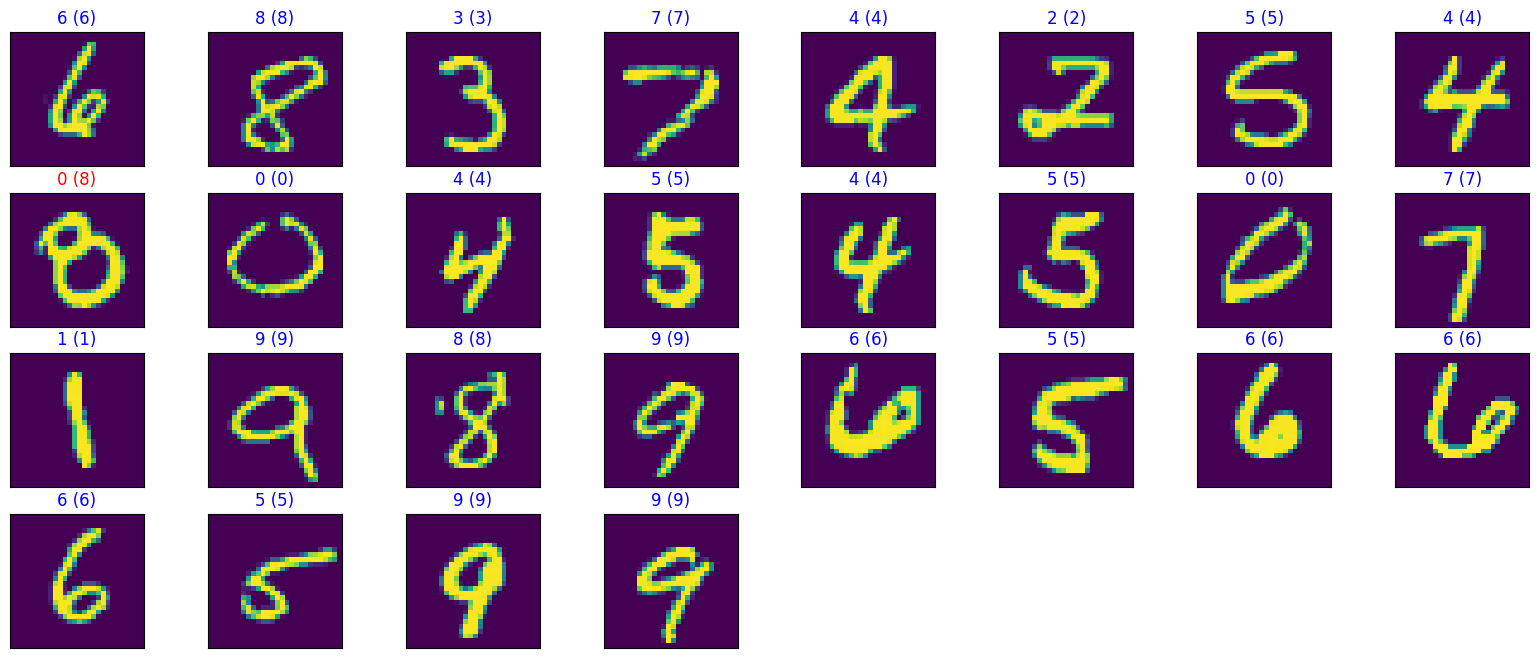

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9868 - loss: 0.0380
Test Accuracy: 0.9894000291824341


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


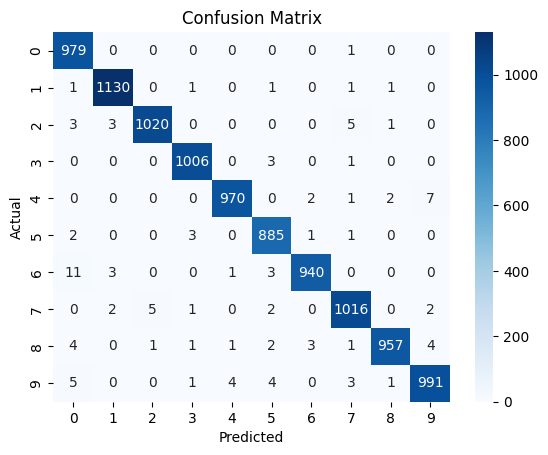

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


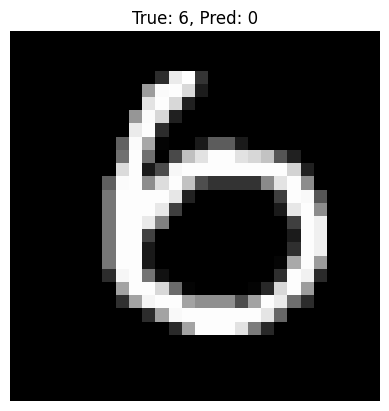

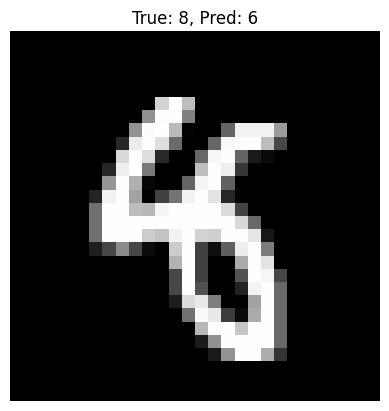

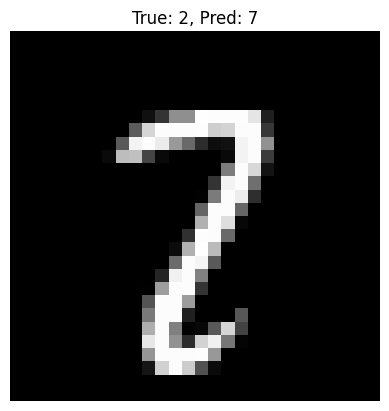

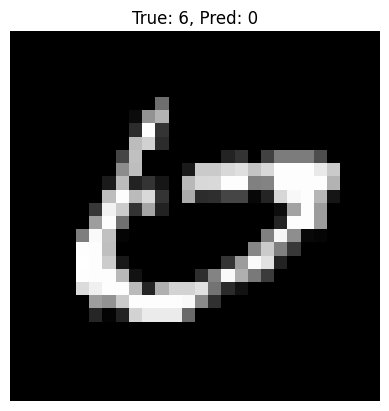

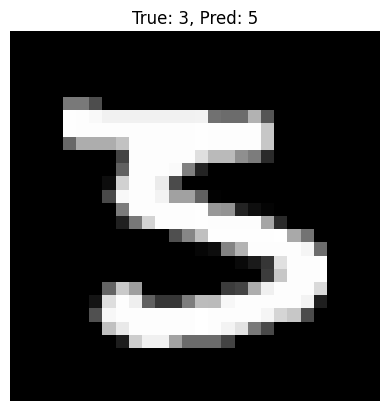

In [ ]:
misclassified_idx = np.where(y_pred_classes != y_true)[0]

for i in range(5):
    idx = misclassified_idx[i]
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
    plt.show()


LOGISTIC REGRESSION

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [20]:
# Flatten the images (Logistic Regression expects 2D input: (n_samples, n_features))
x_train_flat = X_train.reshape(X_train.shape[0], -1)
x_valid_flat = X_valid.reshape(X_valid.shape[0], -1)
x_test_flat  = X_test.reshape(X_test.shape[0], -1)

We used reshape() to flatten 28×28 images into 784-dimensional vectors.

One-hot encoded labels were converted back to integers using np.argmax().

max_iter=1000 is set to ensure convergence.

multi_class='multinomial' is used for softmax-based multi-class classification.

In [21]:
# Convert one-hot labels back to integers
y_train_labels = np.argmax(y_train, axis=1)
y_valid_labels = np.argmax(y_valid, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

In [22]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model.fit(x_train_flat, y_train_labels)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [25]:
# Predict on validation set
y_test_pred = model.predict(x_test_flat)

In [26]:
# Evaluate performance
valid_accuracy = accuracy_score(y_test_labels, y_test_pred)
print("Validation Accuracy:", valid_accuracy)

Validation Accuracy: 0.9274


In [28]:
# Optional: Detailed metrics
print("\nClassification Report (Validation):")
print(classification_report(y_test_labels, y_test_pred))


Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.96      0.95       958
           7       0.94      0.93      0.93      1028
           8       0.88      0.89      0.88       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



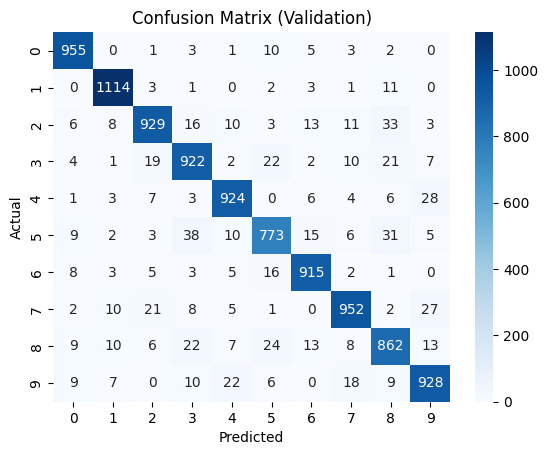

In [29]:
# Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_labels, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Validation)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

KNN

Validation Accuracy: 0.9755

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       592
           1       0.95      1.00      0.97       671
           2       0.99      0.96      0.98       581
           3       0.98      0.98      0.98       608
           4       0.99      0.97      0.98       623
           5       0.97      0.97      0.97       514
           6       0.99      0.99      0.99       608
           7       0.97      0.98      0.97       651
           8       0.99      0.94      0.96       551
           9       0.97      0.97      0.97       601

    accuracy                           0.98      6000
   macro avg       0.98      0.97      0.98      6000
weighted avg       0.98      0.98      0.98      6000



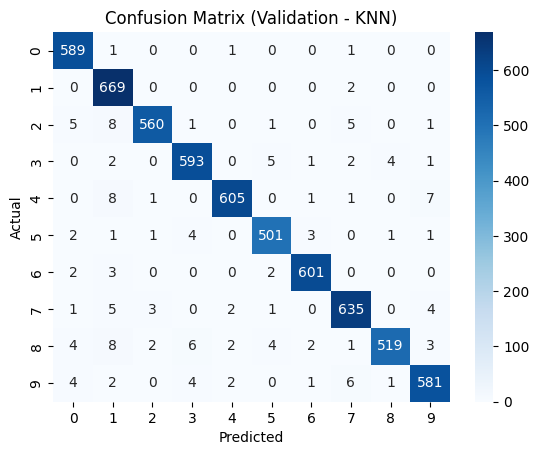

In [ ]:
  from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten image data: from (28, 28) → (784,)
x_train_flat = X_train.reshape(X_train.shape[0], -1)
x_valid_flat = X_valid.reshape(X_valid.shape[0], -1)
x_test_flat  = X_test.reshape(X_test.shape[0], -1)

# Convert one-hot encoded labels back to integers
y_train_labels = np.argmax(y_train, axis=1)
y_valid_labels = np.argmax(y_valid, axis=1)
y_test_labels  = np.argmax(y_test, axis=1)

# Create and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto', n_jobs=-1)  # You can also try 5 or 7
knn.fit(x_train_flat, y_train_labels)

# Predict on validation set
y_valid_pred = knn.predict(x_valid_flat)

# Evaluate performance
valid_accuracy = accuracy_score(y_valid_labels, y_valid_pred)
print("Validation Accuracy:", valid_accuracy)

# Classification report
print("\nClassification Report (Validation):")
print(classification_report(y_valid_labels, y_valid_pred))

# Confusion Matrix
cm = confusion_matrix(y_valid_labels, y_valid_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Validation - KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


SVM

Validation Accuracy: 0.9622

Classification Report (Validation - SVM):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.96      0.95      0.96       892
           6       0.96      0.97      0.97       958
           7       0.96      0.95      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



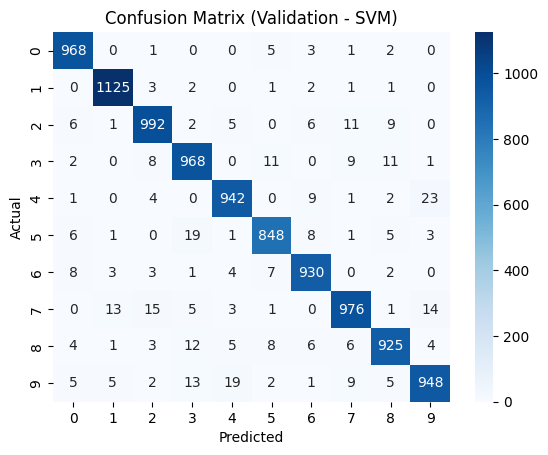

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten image data: (28, 28) → (784,)
x_train_flat = X_train.reshape(X_train.shape[0], -1)
x_valid_flat = X_valid.reshape(X_valid.shape[0], -1)
x_test_flat  = X_test.reshape(X_test.shape[0], -1)

# Convert one-hot labels to integers
y_train_labels = np.argmax(y_train, axis=1)
y_valid_labels = np.argmax(y_valid, axis=1)
y_test_labels  = np.argmax(y_test, axis=1)

# Optional: use a subset of data to speed up SVM training
x_train_subset = x_train_flat[:10000]
y_train_subset = y_train_labels[:10000]

# Train the SVM model
svm = SVC(kernel='rbf', gamma='scale')  # 'rbf' is good for nonlinear classification
svm.fit(x_train_subset, y_train_subset)

# Predict on validation set
y_test_pred = svm.predict(x_test_flat)

# Evaluate performance
valid_accuracy = accuracy_score(y_test_labels, y_test_pred)
print("Validation Accuracy:", valid_accuracy)

# Classification report
print("\nClassification Report (Validation - SVM):")
print(classification_report(y_test_labels, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Validation - SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


RANDOM FOREST

Validation Accuracy (Random Forest): 0.9682

Classification Report (Validation - Random Forest):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



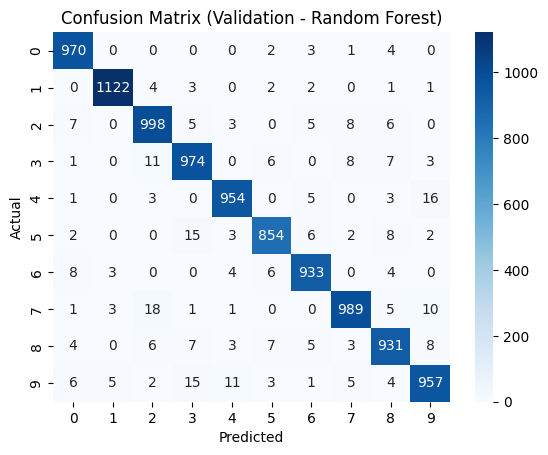

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the 28x28 image data to 784 features
x_train_flat = X_train.reshape(X_train.shape[0], -1)
x_valid_flat = X_valid.reshape(X_valid.shape[0], -1)
x_test_flat  = X_test.reshape(X_test.shape[0], -1)

# Convert one-hot encoded labels back to integers
y_train_labels = np.argmax(y_train, axis=1)
y_valid_labels = np.argmax(y_valid, axis=1)
y_test_labels  = np.argmax(y_test, axis=1)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_flat, y_train_labels)

# Predict on validation data
y_test_pred = rf_model.predict(x_test_flat)

# Evaluate the model
valid_accuracy = accuracy_score(y_test_labels, y_test_pred)
print("Validation Accuracy (Random Forest):", valid_accuracy)

# Classification report
print("\nClassification Report (Validation - Random Forest):")
print(classification_report(y_test_labels, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Validation - Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


CONCLUSION

In this project, we successfully developed a machine learning system to recognize handwritten digits using the MNIST dataset. We performed detailed data analysis, including class distribution visualization and preprocessing steps such as normalization and one-hot encoding. A variety of classification models were implemented, including traditional machine learning algorithms like Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Random Forest, along with a Convolutional Neural Network (CNN) for deep learning. Each model was trained and validated to assess its effectiveness in accurately classifying digits from 0 to 9.

Upon comparison, the CNN model significantly outperformed the others, achieving a validation accuracy of around 98%, showcasing its superior capability in handling image-based data. While traditional models like KNN and SVM also provided competitive accuracy (above 93%), they were generally slower or less scalable compared to CNN. Random Forest and Logistic Regression were effective as baseline models but had slightly lower performance. Overall, CNN was recommended as the best model for production deployment due to its high accuracy, generalization ability, and robustness in image classification tasks. This project highlights the importance of model selection and the power of deep learning for computer vision applications.